## Task 2: Data discovery

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np

#### Creating a dataframe about each country's population :

In [2]:
population = pd.read_csv('population_2014_2019.csv')  
population_df = pd.DataFrame(population) 
population_df.columns = population_df.columns.str.strip().str.replace(' ', '_').str.lower()  
population_df = population_df.rename(columns={'area':'country'})  
population_df = population_df.drop(['element','item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code','item'], axis=1)

#### Calculating the total number of humans on the planet in 2014 and 2019 :

In [3]:
population_df[(population_df.year==2014)].value.sum() * 1000
population_df[(population_df.year==2019)].value.sum() * 1000

9118026110.0

#### Identifying the redundancies among the 11 elements in the Food Balance Sheets : 

Firstly, Domestic supply quantity is the sum of Production qty + Imports + Opening stock - Exports;

Secondly, "Food processing" is booked for food that can't be consummed in its original form such as oats. When processed, the quantity is consequently added to food or feed and written off the food processing stock to avoid duplicates;

As for the relation between all 11 elements : 

Domestic supply quantity = Production qty + Imports + Opening stock - Exports = Closing stock + Food + Feed + Seed + Losses + Processed + Others uses + Tourist consumption + Residuals

Domestic supply quantity = Production qty + Imports + Opening stock - Exports = Production quantity + Imports - Exports - Stock variation = Food + Feed + Seed + Losses + Processed + Others uses + Tourist consumption + Residuals

#### Checking this equation with the example of wheat in France :

In [4]:
wheat_fr_2019 = pd.read_csv('wheat_france.csv')
wheat_fr_2019_df = pd.DataFrame(wheat_fr_2019) 
wheat_fr_2019_df.columns = wheat_fr_2019_df.columns.str.strip().str.replace(' ', '_').str.lower()   
wheat_fr_2019_df = wheat_fr_2019_df.drop(['item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code'], axis=1).rename(columns={'area':'country'})

In [5]:
x1 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Production")].value.sum()
x2 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Import Quantity")].value.sum()
x3 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Export Quantity")].value.sum()
x4 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Stock Variation")].value.sum()

In [6]:
Domestic_supply_quantity = int(x1 + x2 - x3 - x4)
Domestic_supply_quantity

20338

In [7]:
x5 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Food")].value.sum()
x6 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Feed")].value.sum()
x7 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Seed")].value.sum()
x8 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Losses")].value.sum()
x9 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Processing")].value.sum()
x10 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Other uses (non-food)")].value.sum()
x11 = wheat_fr_2019_df[(wheat_fr_2019_df.element=="Residuals")].value.sum()

In [8]:
Domestic_supply_quantity = int(x5 + x6 + x7 + x8 + x9 + x10 + x11)
Domestic_supply_quantity

20338

#### Conclusion :

All 3 terms have been verified.

## Task 3: Cleaning the data, starting by renaming our columns

In [9]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  

population = pd.read_csv('population_2014_2019.csv')  
population_df = pd.DataFrame(population) 
population_df.columns = population_df.columns.str.strip().str.replace(' ', '_').str.lower()  
population_df = population_df.rename(columns={'area':'country'})  
population_df = population_df.drop(['element','item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code','item'], axis=1)
population_df

,country,year,unit,value
0,Afghanistan,2014,1000 persons,33371.0
1,Afghanistan,2019,1000 persons,38042.0
2,Albania,2014,1000 persons,2896.0
3,Albania,2019,1000 persons,2881.0
4,Algeria,2014,1000 persons,38924.0
...,...,...,...,...
355,Yemen,2019,1000 persons,29162.0
356,Zambia,2014,1000 persons,15400.0
357,Zambia,2019,1000 persons,17861.0
358,Zimbabwe,2014,1000 persons,13587.0


#### Checking for duplicates, Nan and suspect data :

In [10]:
population_df.describe()
population_df[population_df.duplicated()==True].count()
population_df[population_df.isna()==True].count()

country    0
year       0
unit       0
value      0
dtype: int64

#### Conclusion :

None found, though the number of countries doesn't seem right. After checking, it appears some items were duplicated under the form of aggregated / individualized data : China mainland, China Macao, China Taiwan and China Hong Kong are all elements adding up to China's total population; Either way, one needs to be removed to avoid double counting.

Filtering "China" out of the set :

In [11]:
population_df = population_df[(population_df.country!="China")]

#### Verifying the accuraciy of the total population of the data set with the official figure :

In [12]:
population_pt = pd.pivot_table(population_df, values='value', index='country', columns=['year'], aggfunc = np.sum, margins=True)

#### Conclusion : 

The data appears to be sufficiently accurate with an official total population for 2014 of 7.2 billion inhabitants;

## Task 4 : Computing new variables

### New variable : food supply in kg

In [14]:
food_supply_2014 = pd.read_csv('food_supply_2014.csv')  
food_supply_2019 = pd.read_csv('food_supply_2019.csv')

frame1 = (food_supply_2014, food_supply_2019)
food_supply = pd.concat(frame1)

food_supply_df = pd.DataFrame(food_supply) 
food_supply_df.columns = food_supply_df.columns.str.strip().str.replace(' ', '_').str.lower()   
food_supply_df = food_supply_df.drop(['item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code'], axis=1).rename(columns={'area':'country'})
food_supply_df

,country,element,item,year,unit,value
0,Afghanistan,Production,Wheat and products,2014,1000 tonnes,5370.00
1,Afghanistan,Import Quantity,Wheat and products,2014,1000 tonnes,1466.00
2,Afghanistan,Stock Variation,Wheat and products,2014,1000 tonnes,250.00
3,Afghanistan,Export Quantity,Wheat and products,2014,1000 tonnes,0.00
4,Afghanistan,Domestic supply quantity,Wheat and products,2014,1000 tonnes,6586.00
...,...,...,...,...,...,...
184781,Zimbabwe,Food,Miscellaneous,2019,1000 tonnes,31.00
184782,Zimbabwe,Food supply quantity (kg/capita/yr),Miscellaneous,2019,kg,2.11
184783,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,kcal/capita/day,2.00
184784,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,g/capita/day,0.07


#### Checking for duplicates, Nan and suspect data :

In [15]:
food_supply_df.describe()
food_supply_df[food_supply_df.duplicated()==True].count()
food_supply_df[food_supply_df.isna()==True].count()

country    0
element    0
item       0
year       0
unit       0
value      0
dtype: int64

In [18]:
food_supply_kg_2014 = food_supply_df[(food_supply_df.element=='Food')&(food_supply_df.year==2014)].reset_index(drop=True)
food_supply_kg_2014 = food_supply_kg_2014.drop(columns={'year'}).rename(columns={'value':'food_2014'}).groupby(['country', 'item']).sum().reset_index()

food_supply_kg_2019 = food_supply_df[(food_supply_df.element=='Food')&(food_supply_df.year==2019)].reset_index(drop=True)
food_supply_kg_2019 = food_supply_kg_2019.drop(columns={'year'}).rename(columns={'value':'food_2019'}).groupby(['country', 'item']).sum().reset_index()

population_df_2014 = population_df[(population_df.year==2014)].filter(items=['country', 'value']).reset_index(drop=True)
population_df_2014 = population_df_2014.rename(columns={'value':'population_2014'})

population_df_2019 = population_df[(population_df.year==2019)].filter(items=['country', 'value']).reset_index(drop=True)
population_df_2019 = population_df_2019.rename(columns={'value':'population_2019'})

frame = (food_supply_kg_2014, food_supply_kg_2019)
food_supply_con = pd.concat(frame)
food_supply_con = food_supply_con.groupby(['country', 'item']).sum().reset_index()


#### Variable food_supply_kg for year 2014 and 2019

In [19]:
food_supply_con['food_supply_kg_2014'] = food_supply_con['food_2014'] * 1000000
food_supply_con['food_supply_kg_2019'] = food_supply_con['food_2019'] * 1000000

In [20]:
food_supply_con

,country,item,food_2014,food_2019,food_supply_kg_2014,food_supply_kg_2019
0,Afghanistan,Apples and products,114.0,166.0,114000000.0,166000000.0
1,Afghanistan,Bananas,64.0,118.0,64000000.0,118000000.0
2,Afghanistan,Barley and products,44.0,13.0,44000000.0,13000000.0
3,Afghanistan,Beans,0.0,0.0,0.0,0.0
4,Afghanistan,Beer,1.0,1.0,1000000.0,1000000.0
...,...,...,...,...,...,...
15536,Zimbabwe,Tea (including mate),0.0,0.0,0.0,0.0
15537,Zimbabwe,Tomatoes and products,25.0,26.0,25000000.0,26000000.0
15538,Zimbabwe,"Vegetables, other",188.0,189.0,188000000.0,189000000.0
15539,Zimbabwe,Wheat and products,397.0,370.0,397000000.0,370000000.0


### New variable : food_supply_kcal

In [21]:
food_supply_kcal_capita_2014 = food_supply_df[(food_supply_df.element=='Food supply (kcal/capita/day)')&(food_supply_df.year==2014)].reset_index(drop=True)
food_supply_kcal_capita_2014 = food_supply_kcal_capita_2014.drop(columns={'year'}).rename(columns={'value':'food_supply_kcal_capita_2014'}).groupby(['country', 'item']).sum().reset_index()

food_supply_kcal_capita_2019 = food_supply_df[(food_supply_df.element=='Food supply (kcal/capita/day)')&(food_supply_df.year==2019)].reset_index(drop=True)
food_supply_kcal_capita_2019 = food_supply_kcal_capita_2019.drop(columns={'year'}).rename(columns={'value':'food_supply_kcal_capita_2019'}).groupby(['country', 'item']).sum().reset_index()

frame2 = (food_supply_kcal_capita_2014, food_supply_kcal_capita_2019)
frame2_1 = (population_df_2014, population_df_2019)
food_supply_con1 = pd.concat(frame2).groupby(['country', 'item']).sum().reset_index()
food_supply_con2 = pd.concat(frame2_1).groupby(['country']).sum().reset_index()
food_supply_m = food_supply_con2.merge(food_supply_con1, how='left', on=['country'])

#### Variable food_supply_kcal for year 2014 and 2019

In [22]:
food_supply_m['food_supply_kcal_2014'] = food_supply_m['food_supply_kcal_capita_2014'] * food_supply_m['population_2014'] * 1000 * 365
food_supply_m['food_supply_kcal_2019'] = food_supply_m['food_supply_kcal_capita_2019'] * food_supply_m['population_2019'] * 1000 * 365

In [68]:
food_supply_m.filter({'item','food_supply_kcal_2014', 'food_supply_kcal_2019'})

,item,food_supply_kcal_2014,food_supply_kcal_2019
0,Apples and products,6.090208e+10,8.331198e+10
1,Bananas,3.654124e+10,6.942665e+10
2,Barley and products,1.461650e+11,4.165599e+10
3,Beer,0.000000e+00,0.000000e+00
4,"Beverages, Alcoholic",0.000000e+00,0.000000e+00
...,...,...,...
15335,Tea (including mate),0.000000e+00,0.000000e+00
15336,Tomatoes and products,4.959255e+09,5.345425e+09
15337,"Vegetables, other",4.959255e+10,4.810882e+10
15338,Wheat and products,1.190221e+12,1.111848e+12


### New variable : food_supply_gprotein

In [69]:
food_supply_gprot_capita_2014 = food_supply_df[(food_supply_df.element=='Protein supply quantity (g/capita/day)')&(food_supply_df.year==2014)]
food_supply_gprot_capita_2014 = food_supply_gprot_capita_2014.drop(columns={'year'}).rename(columns={'value':'food_supply_gprot_capita_2014'}).groupby(['country', 'item']).sum().reset_index()

food_supply_gprot_capita_2019 = food_supply_df[(food_supply_df.element=='Protein supply quantity (g/capita/day)')&(food_supply_df.year==2019)]
food_supply_gprot_capita_2019 = food_supply_gprot_capita_2019.drop(columns={'year'}).rename(columns={'value':'food_supply_gprot_capita_2019'}).groupby(['country', 'item']).sum().reset_index()

frame3 = (food_supply_gprot_capita_2014, food_supply_gprot_capita_2019)
frame3_1 = (population_df_2014, population_df_2019)
food_supply_con3 = pd.concat(frame3).groupby(['country', 'item']).sum().reset_index()
food_supply_con4 = pd.concat(frame3_1).groupby(['country']).sum().reset_index()
food_supply_m2 = food_supply_con4.merge(food_supply_con3, how='left', on=['country'])

#### Variable food_supply_gprot for year 2014 and 2019

In [70]:
food_supply_m2['food_supply_gprot_2014'] = food_supply_m2['food_supply_gprot_capita_2014'] * food_supply_m2['population_2014'] * 1000 * 365
food_supply_m2['food_supply_gprot_2019'] = food_supply_m2['food_supply_gprot_capita_2019'] * food_supply_m2['population_2019'] * 1000 * 365

In [71]:
food_supply_m2.filter({'item','food_supply_gprot_2014', 'food_supply_gprot_2019'})

,food_supply_gprot_2014,item,food_supply_gprot_2019
0,3.654124e+08,Apples and products,5.554132e+08
1,4.872166e+08,Bananas,8.331198e+08
2,4.384949e+09,Barley and products,1.249680e+09
3,0.000000e+00,Beer,0.000000e+00
4,0.000000e+00,"Beverages, Alcoholic",0.000000e+00
...,...,...,...
15357,0.000000e+00,Tea (including mate),0.000000e+00
15358,1.983702e+08,Tomatoes and products,2.138170e+08
15359,2.777183e+09,"Vegetables, other",2.779621e+09
15360,3.392130e+10,Wheat and products,3.266055e+10


### New variable : ratio_kcal_kg

In [27]:
frame4 = (food_supply_con, food_supply_m)
ratio_kcal_kg_conc4 = pd.concat(frame4).groupby(by=['country', 'item']).sum().reset_index()

#### Variable ratio kcal/kg for year 2014 and 2019

In [28]:
ratio_kcal_kg_conc4['ratio_kcal_kg_2014'] = (ratio_kcal_kg_conc4['food_supply_kcal_2014']) / ratio_kcal_kg_conc4['food_supply_kg_2014']
ratio_kcal_kg_conc4['ratio_kcal_kg_2019'] = (ratio_kcal_kg_conc4['food_supply_kcal_2019']) / ratio_kcal_kg_conc4['food_supply_kg_2019']

In [74]:
ratio_kcal_kg_conc4.filter({'item','ratio_kcal_kg_2014', 'ratio_kcal_kg_2019'})

,ratio_kcal_kg_2014,item,ratio_kcal_kg_2019
0,534.228728,Apples and products,501.879398
1,570.956953,Bananas,588.361441
2,3321.931364,Barley and products,3204.306923
3,NaN,Beans,NaN
4,0.000000,Beer,0.000000
...,...,...,...
15537,NaN,Tea (including mate),NaN
15538,198.370200,Tomatoes and products,205.593269
15539,263.790160,"Vegetables, other",254.544048
15540,2998.038287,Wheat and products,3004.995676


Verifying the ratio kcal/kg for the item "Apple"

#### Conclusion :

As expected, an apple contains 50 kcal for 100gr thus 500 kcal for 1kg which confirms the accuracy of the averaged ratio kcal/kg for each item.

### New variable : ratio_gproteine_kg

In [31]:
frame6 = (food_supply_con, food_supply_m2)
ratio_gprot_kg_conc6 = pd.concat(frame6).groupby(by=['country', 'item']).sum().reset_index()

#### Variable ratio gprotein/kg for year 2014 and 2019

In [32]:
ratio_gprot_kg_conc6['ratio_gprot_kg_2014'] = (ratio_gprot_kg_conc6['food_supply_gprot_2014']) / ratio_gprot_kg_conc6['food_supply_kg_2014']
ratio_gprot_kg_conc6['ratio_gprot_kg_2019'] = (ratio_gprot_kg_conc6['food_supply_gprot_2019']) / ratio_gprot_kg_conc6['food_supply_kg_2019']

In [75]:
ratio_gprot_kg_conc6.filter({'item','ratio_gprot_kg_2014', 'ratio_gprot_kg_2019'})

,ratio_gprot_kg_2019,item,ratio_gprot_kg_2014
0,3.345863,Apples and products,3.205372
1,7.060337,Bananas,7.612759
2,96.129208,Barley and products,99.657941
3,NaN,Beans,NaN
4,0.000000,Beer,0.000000
...,...,...,...
15537,NaN,Tea (including mate),NaN
15538,8.223731,Tomatoes and products,7.934808
15539,14.706989,"Vegetables, other",14.772249
15540,88.271748,Wheat and products,85.444091


#### Conclusion :

As expected, an apple contains 0.3g of protein for 100gr thus 3g for 1kg which confirms the accuracy of the averaged ratio gprot/kg.

### New variable : dom_sup_kcal

#### Using the ratio kcal/kg to convert the domestic supply from kg to kcal

In [76]:
dom_supply_2014 = food_supply_df[(food_supply_df.element=='Domestic supply quantity')&(food_supply_df.year==2014)]
dom_supply_2014 = dom_supply_2014.rename(columns={'value':'dom_supply_2014'}).filter(items=['country', 'item', 'dom_supply_2014']).reset_index(drop=True)

dom_supply_2019 = food_supply_df[(food_supply_df.element=='Domestic supply quantity')&(food_supply_df.year==2019)]
dom_supply_2019 = dom_supply_2019.rename(columns={'value':'dom_supply_2019'}).filter(items=['country', 'item', 'dom_supply_2019']).reset_index(drop=True)


frame7 = (dom_supply_2014, dom_supply_2019)
domestic_supply = pd.concat(frame7).groupby(by=['country', 'item']).sum().reset_index()

frame8 = (ratio_kcal_kg_conc4, domestic_supply)
domestic_supply_kcal = pd.concat(frame8).groupby(by=['country', 'item']).sum().reset_index()

#### Variable dom_sup_kcal for year 2014 and 2019 with domestic supply in kg

In [77]:
domestic_supply_kcal['dom_sup_kcal_2014'] = domestic_supply_kcal['ratio_kcal_kg_2014'] * domestic_supply_kcal['dom_supply_2014'] * 1000000
domestic_supply_kcal['dom_sup_kcal_2019'] = domestic_supply_kcal['ratio_kcal_kg_2019'] * domestic_supply_kcal['dom_supply_2019'] * 1000000

In [81]:
domestic_supply_kcal.filter({'item','dom_sup_kcal_2014', 'dom_sup_kcal_2019'})

,dom_sup_kcal_2019,item,dom_sup_kcal_2014
0,0.000000e+00,"Alcohol, Non-Food",0.000000e+00
1,9.636084e+10,Apples and products,6.517590e+10
2,6.942665e+10,Bananas,3.654124e+10
3,4.229685e+11,Barley and products,1.684219e+12
4,-0.000000e+00,Beans,-0.000000e+00
...,...,...,...
16926,-0.000000e+00,Tea (including mate),-0.000000e+00
16927,5.756612e+09,Tomatoes and products,5.355995e+09
16928,5.269062e+10,"Vegetables, other",5.407698e+10
16929,1.132883e+12,Wheat and products,1.202213e+12


### New variable : dom_sup_kgprot

#### Using the ratio gprot/kg to convert the domestic supply from kg to kgprot

In [84]:
frame9 = (ratio_gprot_kg_conc6, domestic_supply)
domestic_supply_gprot = pd.concat(frame9).groupby(by=['country', 'item']).sum().reset_index()

In [85]:
domestic_supply_gprot['dom_sup_kgprot_2014'] = domestic_supply_gprot['ratio_gprot_kg_2014'] * domestic_supply_gprot['dom_supply_2014'] * 1000
domestic_supply_gprot['dom_sup_kgprot_2019'] = domestic_supply_gprot['ratio_gprot_kg_2019'] * domestic_supply_gprot['dom_supply_2019'] * 1000

In [88]:
domestic_supply_gprot.filter({'item', 'dom_sup_kgprot_2014', 'dom_sup_kgprot_2019'})

,dom_sup_kgprot_2019,item,dom_sup_kgprot_2014
0,0.000000e+00,"Alcohol, Non-Food",0.000000e+00
1,6.424056e+05,Apples and products,3.910554e+05
2,8.331198e+05,Bananas,4.872166e+05
3,1.268906e+07,Barley and products,5.052658e+07
4,-0.000000e+00,Beans,-0.000000e+00
...,...,...,...
16926,-0.000000e+00,Tea (including mate),-0.000000e+00
16927,2.302645e+05,Tomatoes and products,2.142398e+05
16928,3.044347e+06,"Vegetables, other",3.028311e+06
16929,3.327845e+07,Wheat and products,3.426308e+07


### New variable : great_import_from_undern_countries

Countries with a malnourishment rate superior to 10% :

In [89]:
malnourishment_rate = pd.read_csv('malnourishment_rate.csv')  


malnourishment_rate_df = pd.DataFrame(malnourishment_rate) 
malnourishment_rate_df.columns = malnourishment_rate_df.columns.str.strip().str.replace(' ', '_').str.lower()   
malnourishment_rate_df = malnourishment_rate_df.drop(['item_code', 'note', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code'], axis=1).rename(columns={'area':'country'})

In [90]:
malnourishment_rate_df = malnourishment_rate_df.replace({'<':''}, regex=True)
malnourishment_rate_df.value = pd.to_numeric(malnourishment_rate_df.value)
malnourishment_rate_df[(malnourishment_rate_df.value>10.0)].sort_values(by='value', ascending=False).reset_index(drop=True)

,country,element,item,year,unit,value
0,Somalia,Value,Prevalence of undernourishment (percent) (3-ye...,2013-2015,%,65.7
1,Somalia,Value,Prevalence of undernourishment (percent) (3-ye...,2018-2020,%,59.5
2,Central African Republic,Value,Prevalence of undernourishment (percent) (3-ye...,2013-2015,%,48.3
3,Central African Republic,Value,Prevalence of undernourishment (percent) (3-ye...,2018-2020,%,48.2
4,Haiti,Value,Prevalence of undernourishment (percent) (3-ye...,2018-2020,%,46.8
...,...,...,...,...,...,...
88,Mongolia,Value,Prevalence of undernourishment (percent) (3-ye...,2013-2015,%,11.5
89,Senegal,Value,Prevalence of undernourishment (percent) (3-ye...,2013-2015,%,11.2
90,Sudan,Value,Prevalence of undernourishment (percent) (3-ye...,2013-2015,%,11.0
91,El Salvador,Value,Prevalence of undernourishment (percent) (3-ye...,2013-2015,%,10.6


Most exported items by these undernourished countries :

In [91]:
countries=['Somalia', 'Central African Republic', 'Haiti', 'Yemen',
       'Madagascar', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Liberia', 'Congo', 'Iraq',
       'Rwanda', 'Chad', 'Mozambique', 'Botswana',
       'Venezuela (Bolivarian Republic of)', 'Timor-Leste',
       'Sierra Leone', 'Afghanistan', 'United Republic of Tanzania',
       'Kenya', 'Papua New Guinea', 'Namibia', 'Lesotho', 'Togo',
       'Nicaragua', 'Solomon Islands', "Côte d'Ivoire", 'Djibouti',
       'Ethiopia', 'Guatemala', 'Angola', 'Malawi', 'Cabo Verde', 'Gabon',
       'Bolivia (Plurinational State of)', 'India', 'Nigeria', 'Honduras',
       'Burkina Faso', 'Bangladesh', 'Pakistan', 'Philippines', 'Gambia',
       'Eswatini', 'Sao Tome and Principe', 'Ecuador', 'Sudan',
       'Mongolia', 'Senegal', 'El Salvador', 'Mali']
highest_exports_2019 = food_supply_df[(food_supply_df.element=='Export Quantity')&(food_supply_df.year==2019)&(food_supply_df.country.isin(countries))].groupby(by=['item']).sum().drop(columns={'year'}).sort_values(by='value', ascending=False).head(25).reset_index()
highest_exports_2019

,item,value
0,Rice and products,21754.00
1,Bananas,12976.00
2,Sugar (Raw Equivalent),11948.00
3,"Vegetables, other",3052.00
4,Pineapples and products,3013.00
5,Pelagic Fish,2594.22
6,Wheat and products,2572.00
7,Palm Oil,2241.00
8,"Fruits, other",2003.00
9,Groundnuts,1954.00


In [92]:
items = ['Rice and products', 'Bananas', 'Sugar (Raw Equivalent)',
       'Vegetables, other', 'Pineapples and products', 'Pelagic Fish',
       'Wheat and products', 'Palm Oil', 'Fruits, other', 'Groundnuts',
       'Onions', 'Coffee and products', 'Sesame seed',
       'Maize and products', 'Bovine Meat', 'Crustaceans',
       'Potatoes and products', 'Coconuts - Incl Copra',
       'Nuts and products', 'Sweeteners, Other', 'Alcohol, Non-Food',
       'Pulses, Other and products', 'Tea (including mate)',
       'Oilcrops Oil, Other', 'Coconut Oil']
highest_200_imports_2019 = food_supply_df[(food_supply_df.element=='Import Quantity')&(food_supply_df.year==2019)&(food_supply_df.item.isin(items))].sort_values(by='value', ascending=False).head(200).reset_index(drop=True)

In [93]:
highest_200_imports_2019['status'] = False

for index, row in highest_200_imports_2019.iterrows():
    if (index == 199):
        break
    elif highest_200_imports_2019.loc[index, 'country'] in countries:
        highest_200_imports_2019.loc[index, 'status'] = True

In [94]:
highest_200_imports_2019[(highest_200_imports_2019.status==True)].reset_index(drop=True)

,country,element,item,year,unit,value,status
0,India,Import Quantity,Palm Oil,2019,1000 tonnes,9732.0,True
1,Philippines,Import Quantity,Wheat and products,2019,1000 tonnes,7422.0,True
2,Nigeria,Import Quantity,Wheat and products,2019,1000 tonnes,4687.0,True
3,Philippines,Import Quantity,Rice and products,2019,1000 tonnes,4634.0,True
4,Bangladesh,Import Quantity,Wheat and products,2019,1000 tonnes,4599.0,True
5,Yemen,Import Quantity,Wheat and products,2019,1000 tonnes,3288.0,True
6,Pakistan,Import Quantity,Palm Oil,2019,1000 tonnes,3165.0,True
7,Afghanistan,Import Quantity,Wheat and products,2019,1000 tonnes,2526.0,True
8,Iraq,Import Quantity,Wheat and products,2019,1000 tonnes,2508.0,True
9,Bangladesh,Import Quantity,Sugar (Raw Equivalent),2019,1000 tonnes,2275.0,True


#### Conlusion : 30 of the 200 highest imports of the 25 most exported items come from countries with more than 10% of malnourishment.

## Task 5 : Identify major trends

### Question 1

In [96]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  

plants_2019 = pd.read_csv('veg_2019.csv', encoding='latin-1')  
plants_2014 = pd.read_csv('veg_2014.csv', encoding='latin-1')  
animals_2019 = pd.read_csv('ani_2019.csv', encoding='latin-1')  
animals_2014 = pd.read_csv('ani_2014.csv', encoding='latin-1')  

df_plants_2019 = pd.DataFrame(plants_2019)  
df_plants_2019.columns = df_plants_2019.columns.str.strip().str.replace(' ', '_').str.lower()  
df_plants_2019 = df_plants_2019.rename(columns={'area':'country'}).drop(['item_code', 'ï»¿domain_code', 'element_code', 'year_code', 'flag', 'domain', 'area_code_(fao)', 'flag_description'], axis=1)

df_plants_2014 = pd.DataFrame(plants_2014)  
df_plants_2014.columns = df_plants_2014.columns.str.strip().str.replace(' ', '_').str.lower()  
df_plants_2014 = df_plants_2014.rename(columns={'area':'country'}).drop(['item_code', 'ï»¿domain_code', 'element_code', 'year_code', 'flag', 'domain', 'area_code_(fao)', 'flag_description'], axis=1)  

df_animals_2019 = pd.DataFrame(animals_2019)  
df_animals_2019.columns = df_animals_2019.columns.str.strip().str.replace(' ', '_').str.lower()  
df_animals_2019 = df_animals_2019.rename(columns={'area':'country'}).drop(['item_code', 'ï»¿domain_code', 'element_code', 'year_code', 'flag', 'domain', 'area_code_(fao)', 'flag_description'], axis=1)    

df_animals_2014 = pd.DataFrame(animals_2014)  
df_animals_2014.columns = df_animals_2014.columns.str.strip().str.replace(' ', '_').str.lower()  
df_animals_2014 = df_animals_2014.rename(columns={'area':'country'}).drop(['item_code', 'ï»¿domain_code', 'element_code', 'year_code', 'flag', 'domain', 'area_code_(fao)', 'flag_description'], axis=1)  

#### Domestic supply qty for vegetales

In [97]:
veg_dom_2014 = df_plants_2014[(df_plants_2014.element=="Domestic supply quantity")]  
veg_dom_2019 = df_plants_2019[(df_plants_2019.element=="Domestic supply quantity")] 

x1 = veg_dom_2014.value.sum() 
x2 = veg_dom_2019.value.sum() 

In [98]:
x1

9162890.0

In [99]:
x2

9905378.0

#### Domestic supply qty for animals 

In [48]:
ani_dom_2014 = df_animals_2014[(df_animals_2014.element=="Domestic supply quantity")]  
ani_dom_2019 = df_animals_2019[(df_animals_2019.element=="Domestic supply quantity")]  

x3 = ani_dom_2014.value.sum() 
x4 = ani_dom_2019.value.sum() 

In [100]:
x3

21458.0

In [101]:
x4

1085.0

#### Global Domestic supply qty for vegetales and animals  

In [103]:
xtot1 = x1 + x3  
xtot2 = x2 + x4 

In [104]:
xtot1

9184348.0

In [105]:
xtot2

9906463.0

#### Proportion of Global Domestic Supply per item for year 2014

In [107]:
x5 = df_plants_2014[(df_plants_2014.element=="Food")].value.sum()  
x6 = df_plants_2019[(df_plants_2019.element=="Food")].value.sum()  
x7 = df_plants_2014[(df_plants_2014.element=="Feed")].value.sum()  
x8 = df_plants_2019[(df_plants_2019.element=="Feed")].value.sum()  
x9 = df_plants_2014[(df_plants_2014.element=="Losses")].value.sum()  
x10 = df_plants_2019[(df_plants_2019.element=="Losses")].value.sum()  
x11 = df_plants_2014[(df_plants_2014.element=="Other uses (non-food)")].value.sum()  
x12 = df_plants_2019[(df_plants_2019.element=="Other uses (non-food)")].value.sum()  

food_ratio_2014 = x5 / xtot1 * 100  
feed_ratio_2014 = x7 / xtot1 * 100  
losses_ratio_2014 = x9 / xtot1 * 100  
other_uses_ratio_2014 = x11 / xtot1 * 100 

food_ratio_2019 = x6 / xtot2 * 100  
feed_ratio_2019 = x8 / xtot2 * 100  
losses_ratio_2019 = x10 / xtot2 * 100  
other_uses_ratio_2019 = x12 / xtot2 * 100 

In [108]:
food_ratio_2014

43.431226691323104

In [109]:
feed_ratio_2014

12.888372696679177

In [110]:
losses_ratio_2014

5.934084814730452

In [111]:
other_uses_ratio_2014

8.206940764875197

In [112]:
food_ratio_2019

43.12697680292148

In [113]:
feed_ratio_2019

13.762328693904172

In [114]:
losses_ratio_2019

5.832384373716431

In [115]:
other_uses_ratio_2019

9.017204223142002

### Question 2

Observation : 

Average consumption of calories per human = 2400 kcal/day/person for males and 2000 kcal/day/person for females; averaging at 2200 kcal/day/person ;

Average consumption of protein per human = 56 grams per day for the average sedentary man and 46 grams per day for the average sedentary woman; averaging at 51 g per day

#### Using the Food supply in kcal and kgproteine to determine the share of "food and feed" in calories and protein in 2019

In [117]:
food_feed_2019_kcal = df_plants_2019[(df_plants_2019.element=='Food supply (kcal/capita/day)')&(df_plants_2019.year==2019)].reset_index(drop=True)
food_feed_2019_kcal = food_feed_2019_kcal.drop(columns={'year'}).rename(columns={'value':'food_supply_kcal_capita_2019'})
food_feed_2019_m1 = food_feed_2019_kcal.merge(population_df_2019 , how='left', on='country')

food_feed_2019_gprot = df_plants_2019[(df_plants_2019.element=='Protein supply quantity (g/capita/day)')&(df_plants_2019.year==2019)].reset_index(drop=True)
food_feed_2019_gprot = food_feed_2019_gprot.drop(columns={'year'}).rename(columns={'value':'food_supply_gprot_capita_2019'})
food_feed_2019_m2 = food_feed_2019_gprot.merge(population_df_2019 , how='left', on='country')

food_feed_2019_m1['food_feed_2019_kcal'] = food_feed_2019_m1['food_supply_kcal_capita_2019'] * food_feed_2019_m1['population_2019'] * 1000
food_feed_2019_m2['food_feed_2019_gprot'] = food_feed_2019_m2['food_supply_gprot_capita_2019'] * food_feed_2019_m2['population_2019'] * 1000

In [118]:
food_feed_2019_m1.filter({'item','food_feed_2019_kcal'})

,food_feed_2019_kcal,item
0,5.276425e+10,Wheat and products
1,4.793292e+09,Rice and products
2,1.141260e+08,Barley and products
3,1.217344e+09,Maize and products
4,3.804200e+07,Oats
...,...,...
11333,2.782550e+08,Beer
11334,8.787000e+07,"Beverages, Fermented"
11335,4.539950e+08,"Beverages, Alcoholic"
11336,0.000000e+00,Infant food


In [119]:
food_feed_2019_m2.filter({'item','food_feed_2019_gprot'})

,food_feed_2019_gprot,item
0,1.423151e+09,Wheat and products
1,9.092038e+07,Rice and products
2,3.423780e+06,Barley and products
3,3.271612e+07,Maize and products
4,1.521680e+06,Oats
...,...,...
11349,3.221900e+06,Beer
11350,1.171600e+06,"Beverages, Fermented"
11351,0.000000e+00,"Beverages, Alcoholic"
11352,0.000000e+00,Infant food


#### Plant based items total GDP in kcal and gprotein :

In [52]:
x13 = int(food_feed_2019_m1.food_feed_2019_kcal.sum())
x14 = int(food_feed_2019_m2.food_feed_2019_gprot.sum())

#### Calculating the number of humans that could be fed from all the plant-based food supply  

In [53]:
Pop_fed_kcal_2019 = (x13 / 2200) / (population_df_2019.population_2019.sum() * 1000)
Pop_fed_kgprot_2019 = (x14 / 51) / (population_df_2019.population_2019.sum() * 1000)

In [54]:
Pop_fed_kgprot_2019

0.9773606308008054

#### Conclusion :

If all plant-based food was fed to humans, including food and feed, then 109% of the total population in 2019 could eat 2200 kcal a day and 97.7% could eat 51 g of protein a day. So why are we wasting so much food to produce animal products ? Our world's hunger and undernourishment problem could be dealt with in a instant...  moreover, producing animal products requires enormous amounts of energy and water.

Fact : A toxic blend of conflict, climate change, and Covid-19 has caused the number of people facing chronic hunger to increase by as much as 161 million in the last year, and as many as 2.37 billion people—one in every three on the planet— did not have access to adequate food in 2020

### Question 3

Fact : According to the Food and Agriculture Organization of the United Nations, the world produces more than 1 1/2 times enough food to feed everyone on the planet. 

Fact : The world's total total food supply was estimated at 507,613 kcal per capita per day in 2019.

Fact : An estimated 25 percent of the world’s food calories and up to 50 percent of total food weight are lost or wasted before they can be consumed.

#### Year 2019's global food supply in kcal :

In [55]:
x15 = food_supply_m.food_supply_kcal_2019.sum()

#### Percentage of people that could be fed (kcal) :

In [56]:
(x15 / (2200*365)) / (population_df_2019.population_2019.sum() * 1000) * 100

134.16735254952133

#### Year 2019's global food supply in gproteine :

In [57]:
x16 = food_supply_m2.food_supply_gprot_2019.sum()

#### Percentage of people that could be fed (gprot) :

In [58]:
(x16 / (51*365)) / (population_df_2019.population_2019.sum() * 1000) * 100

162.65076474352585

#### Conclusion :

The global food supply could feed as a whole 134% of the total population's needs in calories and 162% of its needs in protein. The result based on proteins is in this case higher since we now take into consideration animal products which usually contain a higher percentage of protein than vegetales.

### Question 4

In [126]:
population_undernourished = pd.read_csv('population_undernourished.csv')
population_undernourished_df = pd.DataFrame(population_undernourished)
population_undernourished_df.columns = population_undernourished_df.columns.str.strip().str.replace(' ', '_').str.lower() 
population_undernourished_df = population_undernourished_df.rename(columns={'area':'country'})  
population_undernourished_df = population_undernourished_df.drop(['note', 'element','item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code','item'], axis=1)

In [127]:
population_undernourished_df.value.unique()
population_undernourished_df = population_undernourished_df.replace({'<':'', 'Nan':''}, regex=True)
population_undernourished_df.value = pd.to_numeric(population_undernourished_df.value)

In [128]:
population_undernourished_df

,country,year,unit,value
0,Afghanistan,2009-2011,millions,6.9
1,Afghanistan,2011-2013,millions,8.8
2,Afghanistan,2013-2015,millions,8.1
3,Afghanistan,2015-2017,millions,7.8
4,Afghanistan,2017-2019,millions,8.7
...,...,...,...,...
1010,Zimbabwe,2009-2011,millions,NaN
1011,Zimbabwe,2011-2013,millions,NaN
1012,Zimbabwe,2013-2015,millions,NaN
1013,Zimbabwe,2015-2017,millions,NaN


Observation : 90 countries have their number of malnourished people unregistered, which strongly biases the final result. There's one way of walking around this issue, taking the average of the available data and assigning it to low developped countries since they are the most likely to foster this problem.

In [129]:
avg_number_undernourished = population_undernourished_df.value.mean()
avg_number_undernourished

5.06522522522522

In [130]:
least_developped_countries = pd.read_csv('least_developped_countries.csv')
least_developped_countries_df = pd.DataFrame(least_developped_countries)
least_developped_countries_df.columns = least_developped_countries_df.columns.str.strip().str.replace(' ', '_').str.lower() 
least_developped_countries_df = least_developped_countries_df.rename(columns={'area':'country'})  
least_developped_countries_df = least_developped_countries_df.drop(['element','item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code','item'], axis=1)
least_developped_countries_df

,country,year,unit,value
0,Afghanistan,2019,1000 persons,38042.00
1,Angola,2019,1000 persons,31825.00
2,Bangladesh,2019,1000 persons,163046.00
3,Benin,2019,1000 persons,11801.00
4,Burkina Faso,2019,1000 persons,20321.00
5,Burundi,2019,1000 persons,11530.58
6,Cambodia,2019,1000 persons,16487.00
7,Central African Republic,2019,1000 persons,4745.00
8,Chad,2019,1000 persons,15947.00
9,Comoros,2019,1000 persons,851.00


In [131]:
least_developped_countries = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Central African Republic', 'Chad',
       'Comoros', 'Democratic Republic of the Congo', 'Djibouti',
       'Ethiopia', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Kiribati', "Lao People's Democratic Republic", 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'Sudan', 'Timor-Leste', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Vanuatu', 'Yemen', 'Zambia']

In [132]:
population_undernourished_df['status'] = False

for index, row in population_undernourished_df.iterrows():
    if population_undernourished_df.loc[index, 'country'] in least_developped_countries:
        population_undernourished_df.loc[index, 'status'] = True
    else:
        population_undernourished_df.loc[index, 'status'] = False     

In [136]:
population_undernourished_df['value'] = np.where((population_undernourished_df['status']==True)&(population_undernourished_df['value'].isna()), 5.06, population_undernourished_df['value'])

In [137]:
population_undernourished_df

,country,year,unit,value,status
0,Afghanistan,2009-2011,millions,6.9,True
1,Afghanistan,2011-2013,millions,8.8,True
2,Afghanistan,2013-2015,millions,8.1,True
3,Afghanistan,2015-2017,millions,7.8,True
4,Afghanistan,2017-2019,millions,8.7,True
...,...,...,...,...,...
1010,Zimbabwe,2009-2011,millions,NaN,False
1011,Zimbabwe,2011-2013,millions,NaN,False
1012,Zimbabwe,2013-2015,millions,NaN,False
1013,Zimbabwe,2015-2017,millions,NaN,False


In [139]:
population_undernourished_df_grouped = population_undernourished_df.groupby(by=['year']).sum().drop(columns={'status'}).reset_index()
population_undernourished_df_grouped

,year,value
0,2009-2011,613.52
1,2011-2013,600.52
2,2013-2015,587.42
3,2015-2017,585.12
4,2017-2019,601.72


Percentage of the total population undernourished :

In [140]:
(population_undernourished_df_grouped[(population_undernourished_df_grouped.year=='2017-2019')].value.sum() * 1000000) / (population_df_2019.population_2019.sum() * 1000) * 100

7.863162150482118

#### Conclusion :

7.86% of the world's population is undernourished, which amounts to 601,726,577 people. 

### Question 5

In [141]:
undernourished_rate = pd.read_csv('undernourished_rate.csv')
undernourished_rate_df = pd.DataFrame(undernourished_rate)
undernourished_rate_df.columns = undernourished_rate_df.columns.str.strip().str.replace(' ', '_').str.lower() 
undernourished_rate_df = undernourished_rate_df.rename(columns={'area':'country'})  
undernourished_rate_df = undernourished_rate_df.drop(['note','element','item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code','item'], axis=1)

undernourished_rate_df = undernourished_rate_df.replace({'<':''}, regex=True)
undernourished_rate_df.value = pd.to_numeric(undernourished_rate_df.value)
undernourished_rate_df[(undernourished_rate_df.year=='2017-2019')].sort_values(by='value', ascending=False).head(20).reset_index(drop=True)

,country,year,unit,value
0,Somalia,2017-2019,%,57.4
1,Haiti,2017-2019,%,47.9
2,Central African Republic,2017-2019,%,46.7
3,Yemen,2017-2019,%,45.4
4,Democratic People's Republic of Korea,2017-2019,%,42.6
5,Madagascar,2017-2019,%,42.6
6,Democratic Republic of the Congo,2017-2019,%,40.4
7,Liberia,2017-2019,%,37.5
8,Iraq,2017-2019,%,37.4
9,Congo,2017-2019,%,36.8


<bound method _AxesBase.set_xlabel of <AxesSubplot:title={'center':'The undernourishment state in 2019'}, xlabel='country count', ylabel='Count'>>

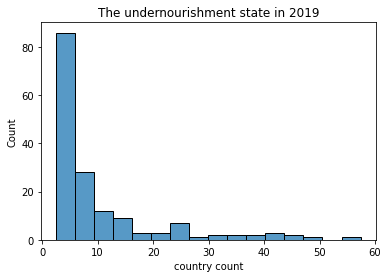

In [142]:
undernourished_rate_df_2019 = undernourished_rate_df[(undernourished_rate_df.year=='2017-2019')]
undernourished_rate_df_2019 = undernourished_rate_df_2019.rename(columns={'value':'country count'})
xxxx = sns.histplot(data=undernourished_rate_df_2019, x="country count")
xxxx.set(title='The undernourishment state in 2019')
xxxx.set_xlabel

In [143]:
undernourished_rate_df

,country,year,unit,value
0,Afghanistan,2009-2011,%,23.7
1,Afghanistan,2011-2013,%,28.2
2,Afghanistan,2013-2015,%,24.2
3,Afghanistan,2015-2017,%,22.2
4,Afghanistan,2017-2019,%,23.4
...,...,...,...,...
1213,Zimbabwe,2011-2013,%,NaN
1214,Zimbabwe,2013-2015,%,NaN
1215,Zimbabwe,2015-2017,%,NaN
1216,Zimbabwe,2017-2019,%,NaN


Let's study exports on countries with an undernutrition rate over 40% :

In [144]:
undernourished_rate_df[(undernourished_rate_df.year=='2017-2019')&(undernourished_rate_df.value>40)].reset_index(drop=True)

,country,year,unit,value
0,Central African Republic,2017-2019,%,46.7
1,Democratic People's Republic of Korea,2017-2019,%,42.6
2,Democratic Republic of the Congo,2017-2019,%,40.4
3,Haiti,2017-2019,%,47.9
4,Madagascar,2017-2019,%,42.6
5,Somalia,2017-2019,%,57.4
6,Yemen,2017-2019,%,45.4


In [145]:
countries = ['Central African Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Haiti', 'Madagascar',
       'Somalia', 'Yemen']
export_qty = food_supply_df[(food_supply_df.country.isin(countries))&(food_supply_df.element=='Export Quantity')&(food_supply_df.year==2019)].groupby(by=['item', 'year']).sum().sort_values(by='value', ascending=False).reset_index().head(25)

The 25 items the most exported by these countries :

In [146]:
export_qty

,item,year,value
0,Wheat and products,2019,123.00
1,"Fruits, other",2019,104.00
2,Onions,2019,67.00
3,"Molluscs, Other",2019,54.99
4,Groundnuts,2019,47.00
5,Pelagic Fish,2019,45.73
6,Bananas,2019,42.00
7,Cephalopods,2019,37.44
8,Cocoa Beans and products,2019,35.00
9,Beans,2019,34.00


Finding the greatest other_uses to domestic supply quantity ratio amoung these countries :

In [147]:
exported_items = ['Wheat and products', 'Fruits, other', 'Onions', 'Molluscs, Other',
       'Groundnuts', 'Pelagic Fish', 'Bananas', 'Cephalopods',
       'Cocoa Beans and products', 'Beans', 'Vegetables, other',
       'Crustaceans', 'Marine Fish, Other', 'Pulses, Other and products',
       'Sugar (Raw Equivalent)', 'Cloves', 'Maize and products',
       'Nuts and products', 'Potatoes and products',
       'Coffee and products', 'Demersal Fish', 'Palm Oil',
       'Spices, Other', 'Peas', 'Pepper'] 

domestic_supply_quantity = food_supply_df[(food_supply_df.item.isin(exported_items))&(food_supply_df.country.isin(countries))&(food_supply_df.year==2019)&(food_supply_df.element=="Domestic supply quantity")].reset_index(drop=True)
other_uses = food_supply_df[(food_supply_df.item.isin(exported_items))&(food_supply_df.country.isin(countries))&(food_supply_df.year==2019)&(food_supply_df.element=="Other uses (non-food)")].reset_index(drop=True)

merge_1 = domestic_supply_quantity.merge(other_uses, how='left', on=['country', 'item', 'year', 'unit'])
merge_1["other_use_to_domestic_qty_ratio"] = merge_1["value_y"] / merge_1["value_x"]
merge_1 = merge_1.sort_values(by='other_use_to_domestic_qty_ratio', ascending=False)
merge_1_filtered = merge_1.filter(items=['country', 'item', 'year', 'other_use_to_domestic_qty_ratio']).dropna().reset_index(drop=True)
merge_1_filtered.head(10)

,country,item,year,other_use_to_domestic_qty_ratio
0,Yemen,Cephalopods,2019,0.962567
1,Democratic Republic of the Congo,Coffee and products,2019,0.916667
2,Madagascar,Palm Oil,2019,0.758929
3,Haiti,Palm Oil,2019,0.748428
4,Madagascar,"Spices, Other",2019,0.333333
5,Yemen,Palm Oil,2019,0.178378
6,Yemen,Sugar (Raw Equivalent),2019,0.127764
7,Democratic People's Republic of Korea,Maize and products,2019,0.112583
8,Madagascar,"Fruits, other",2019,0.020710
9,Madagascar,Maize and products,2019,0.008929


Finding the greatest feed to (food+feed) ratio amoung these countries :

In [148]:
food = food_supply_df[(food_supply_df.item.isin(exported_items))&(food_supply_df.country.isin(countries))&(food_supply_df.year==2019)&(food_supply_df.element=="Food")].reset_index(drop=True)
feed = food_supply_df[(food_supply_df.item.isin(exported_items))&(food_supply_df.country.isin(countries))&(food_supply_df.year==2019)&(food_supply_df.element=="Feed")].reset_index(drop=True)

merge_2 = food.merge(feed, how='left', on=['country', 'item', 'year', 'unit'])
merge_2['ratio_feed_foodfeed'] = (merge_2['value_y'] / (merge_2['value_x'] + merge_2['value_y']))
merge_2 = merge_2.sort_values(by='ratio_feed_foodfeed', ascending=False)
merge_2_filtered = merge_2.filter(items=['country', 'item', 'year', 'ratio_feed_foodfeed']).dropna().reset_index(drop=True)
merge_2_filtered.head(10)

,country,item,year,ratio_feed_foodfeed
0,Yemen,Peas,2019,0.636364
1,Yemen,Maize and products,2019,0.410191
2,Madagascar,Pelagic Fish,2019,0.299180
3,Yemen,"Pulses, Other and products",2019,0.238806
4,Haiti,Wheat and products,2019,0.193955
5,Haiti,Beans,2019,0.180180
6,Madagascar,"Pulses, Other and products",2019,0.166667
7,Yemen,Potatoes and products,2019,0.135266
8,Democratic Republic of the Congo,Beans,2019,0.123077
9,Democratic People's Republic of Korea,Maize and products,2019,0.111043


#### Conclusion 1 :

The items with the greatest other_uses to domestic_supply_quantity ratio  are used in applications other than food such as inedible products : caffeine in coffee for anti-aging creams, gardening soil. Fruits and spices in shampoo or soap for their flavours. That is why they are accounted for under "industrial use" or "other uses" and not "food".

#### Conclusion 2 :

Cereales, peas and pulses are fed in large quantities to animals as a source of energy because of their high starch content.

### Question 6

In [149]:
x21 = df_plants_2019[((df_plants_2019.element=="Food")|(df_plants_2019.element=="Feed"))&(df_plants_2019.item=="Cereals, Other")].value.sum()
x22 = df_plants_2019[(df_plants_2019.element=="Feed")&(df_plants_2019.item=="Cereals, Other")].value.sum()

#### Calculating the proportion of cereal used for feed : 

In [150]:
x22/x21 * 100

70.71351683838229

#### Conclusion :

70% of cereals are used to feed livestock which is then either used for labour or fed back to humans.
​

### Question 7

In [151]:
df_animals_2019[(df_animals_2019.element=="Production")].value.sum() * 1000000

1545245050000.0

In [152]:
cereals = ['Wheat and products', 'Rice and products', 'Barley and products','Maize and products', 'Rye and products', 'Oats', 'Millet and products', 'Sorghum and products', 'Cereals, Other']
cereals_release_2019 = df_plants_2019[(df_plants_2019.item.isin(cereals))&(df_plants_2019.element=='Feed')&(df_plants_2019.country=='United States of America')].reset_index()
cereals_release_2019_sum = (df_plants_2019[(df_plants_2019.item.isin(cereals))&(df_plants_2019.element=='Feed')&(df_plants_2019.country=='United States of America')].value.sum() * 1000) * 0.1

Quantity in weight of food that could be released :

In [153]:
cereals_release_2019_kcal = cereals_release_2019.merge(ratio_kcal_kg_conc4, how='left', on=['country', 'item'])
cereals_release_2019_kcal['cereals_release_2019_kcal'] = cereals_release_2019_kcal['value'] * 1000000 * cereals_release_2019_kcal['ratio_kcal_kg_2019']
cereals_release_2019_kcal.cereals_release_2019_kcal.sum()

439588151408678.5

Number of humans that could be fed with a daily intake of 2200 calories :

In [154]:
cereals_release_2019_kcal.cereals_release_2019_kcal.sum() / (2200 * 365)

547432318.0680928

#### Conclusion :

If the United States of America reduced their production of animal products, thus reducing by 10% the amount of food "fed" to animals, it could release 15,813,600 tonnes of food from grains which is approximately equal to 4.4e14 kcal of food. This same amount of food could provide 2200 kcal daily to 547,4 million people, which represents 7.1% of the global population.

### Question 8

In [155]:
exports_cassava_thailand_2019 = df_plants_2019[(df_plants_2019.country=="Thailand")&(df_plants_2019.item=="Cassava and products")]
(exports_cassava_thailand_2019[(exports_cassava_thailand_2019.element=='Export Quantity')].value.sum() / exports_cassava_thailand_2019[(exports_cassava_thailand_2019.element=='Domestic supply quantity')].value.sum())*100

75.35163449413133

In [156]:
undernourished_rate_df[(undernourished_rate_df.year=='2017-2019')&(undernourished_rate_df.country=='Thailand')].reset_index(drop=True)

,country,year,unit,value
0,Thailand,2017-2019,%,7.9


#### Conclusion :

75% of cassava from the global domestic supply quantity is exported and the proportion of undernutrition is 7.9%.

## Task 6 : Computing new variables


Causes of hunger : 

    - food shortages leading to global food supply < global food utilization
    - poor nutrition; in order to thrive, humans need a range of foods providing a variety of essential health benefits. Families living in poverty often rely on just one or two staple foods (like corn or wheat)
    - food waste, according to the World Food Programme, one-third of all food produced — over 1.3 billion tons of it — is never consumed and costs energy to be produced which ultimatly has a double negative effect on already undernourished countries.
    - demography, if the population of a country and its food supply don't increase proportionaly, then food utilization could exceed food supply, leading to starvation.
    - utilization of food in feeding animals which will then be transformed into meat products; For instance, it takes 2.5 pounds of grain to produce 1 pound of beef and 100 litres of water; An average calf weighs 600 pounds before it starts eating grains...

Number of people going to bed hungry in 1000 people : 

In [157]:
population_undernourished_df_grouped

,year,value
0,2009-2011,613.52
1,2011-2013,600.52
2,2013-2015,587.42
3,2015-2017,585.12
4,2017-2019,601.72


[Text(0.5, 1.0, 'Total population undernourished (unit = 1000 people)')]

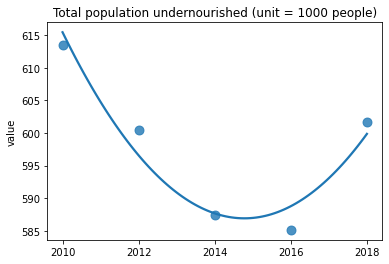

In [158]:
ax = sns.regplot(x=[1, 2, 3, 4 ,5], y="value", data=population_undernourished_df_grouped,
                 scatter_kws={"s": 80},
                 order=2, ci=None)
ax.set(xticks=np.arange(1, 6, 1))
ax.set_xticklabels(['2010','2012','2014', '2016', '2018'])
ax.set(title='Total population undernourished (unit = 1000 people)')

#### Conclusion :

1 in 9 people go to bed hungry. Statistics showed progress that is slowly fading away. Climate change will increase food insecurity. Food production will be impactted by the increase of the temperature of the atmosphere (rise the sea levels, change in climate metrics, fauna species extinction...).

Number of people in a sever state of food insecurity :

In [163]:
severely_undernourished_people = pd.read_csv('severely_undernourished_people.csv')  

severely_undernourished_people_df = pd.DataFrame(severely_undernourished_people)  
severely_undernourished_people_df = severely_undernourished_people_df.drop(columns={'Note','Item Code', 'Element Code', 'Year Code', 'Flag','Flag Description','Area Code (FAO)','Domain','Domain Code'})
severely_undernourished_people_df = severely_undernourished_people_df.rename(columns={'Area':'country', 'Value':'value'})
severely_undernourished_people_df.columns = severely_undernourished_people_df.columns.str.strip().str.replace(' ', '_').str.lower()
severely_undernourished_people_df = severely_undernourished_people_df.replace({'<':'', 'Nan':''}, regex=True)
severely_undernourished_people_df.value = pd.to_numeric(severely_undernourished_people_df.value)

In [164]:
severely_undernourished_people_df_grouped = severely_undernourished_people_df.groupby(by=['year']).sum().reset_index()
severely_undernourished_people_df_grouped = severely_undernourished_people_df_grouped.reset_index()
severely_undernourished_people_df_grouped

,index,year,value
0,0,2015-2017,208.0
1,1,2017-2019,259.1
2,2,2018-2020,358.1


[Text(0.5, 1.0, 'Total population severely undernourished (unit = 1000 people)')]

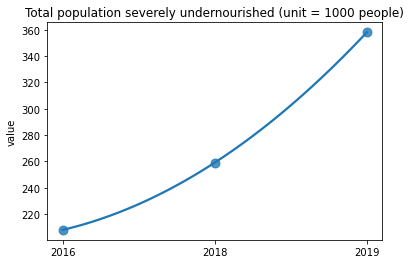

In [165]:
ax2 = sns.regplot(x=[1, 2, 3], y="value", data=severely_undernourished_people_df_grouped,
                 scatter_kws={"s": 80},
                 order=2, ci=None)
ax2.set(xticks=np.arange(1, 4, 1))
ax2.set_xticklabels(['2016','2018','2019'])
ax2.set(title='Total population severely undernourished (unit = 1000 people)')

Now looking for the projected population :

In [166]:
total_population = pd.read_csv('total_population.csv')  

total_population_df = pd.DataFrame(total_population)  
total_population_df = total_population_df.drop(columns={'Item Code', 'Element Code', 'Year Code', 'Flag','Flag Description','Area Code (FAO)','Domain','Domain Code'})
total_population_df = total_population_df.rename(columns={'Area':'country', 'Value':'population'})
total_population_df.columns = total_population_df.columns.str.strip().str.replace(' ', '_').str.lower()

In [167]:
total_population_df_grouped = total_population_df.groupby(by=['year']).sum().reset_index()
total_population_df_grouped = total_population_df_grouped.reset_index()

In [169]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(total_population_df_grouped['index'],total_population_df_grouped['population'])

In [170]:
slope, intercept, r_value, p_value, std_err

(159838.18000000008,
 6902407.963333333,
 0.9938709704986564,
 5.6232385437847505e-05,
 8889.245601777331)

We find ourself in the case of a linear relationship and the plot clearly shows that we have a good model to predict the total population in 2050 with a R_value of 0.9938.

[Text(0.5, 1.0, 'Evolution of the global population')]

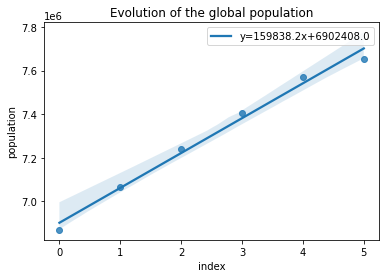

In [171]:
reg = sns.regplot(x='index', y='population', data=total_population_df_grouped, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
reg.legend()
reg.set(title='Evolution of the global population')

In [172]:
x_year_index = 5
y_population = 159838.18000000008 * x_year_index + 6902407.963333333
y_population

7701598.863333333

Total predicted population in 2050 : 

In [173]:
x_year_index = 39
y_population = 159838.18000000008 * x_year_index + 6902407.963333333
pop_2050 = int(y_population * 1000)
pop_2050

13136096983

... the population increased by 71% from 2019 to 2050; let's study the relationship between food and population both sex and try and predict by how much food production should be increased to meet our needs in 2050 :

In [174]:
total_food_supply = pd.read_csv('total_food_supply.csv')

total_food_supply_df = pd.DataFrame(total_food_supply) 
total_food_supply_df.columns = total_food_supply_df.columns.str.strip().str.replace(' ', '_').str.lower()   
total_food_supply_df = total_food_supply_df.drop(['item_code', 'element_code', 'year_code', 'flag','flag_description','area_code_(fao)','domain','domain_code'], axis=1).rename(columns={'area':'country'})

In [175]:
year = [2010, 2012, 2014, 2016, 2018, 2019]
total_food_supply_df_filtered = total_food_supply_df[(total_food_supply_df.element=='Food')&(total_food_supply_df.year.isin(year))]
total_food_supply_df_filtered = total_food_supply_df_filtered.rename(columns={'value':'food_1000T'}).groupby(['country', 'element', 'unit', 'year']).sum().reset_index()
total_food_supply_merge = total_food_supply_df_filtered.merge(total_population_df, how='left', on='country')

In [176]:
food_1000T = total_food_supply_df_filtered.groupby(by=['year']).sum().reset_index()

In [177]:
total_pop_food_1000T = total_population_df_grouped.merge(food_1000T, how='left', on='year')

In [178]:
from scipy import stats
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(total_pop_food_1000T['population'],total_pop_food_1000T['food_1000T'])

Food consumption in function of population

[Text(0.5, 1.0, 'Food consumption in function of population')]

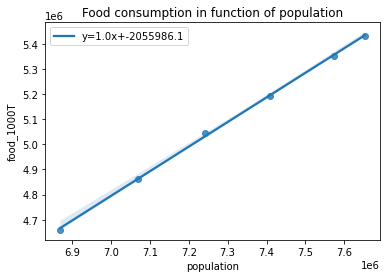

In [179]:
reg2 = sns.regplot(x='population', y='food_1000T', data=total_pop_food_1000T, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
reg2.legend()
reg2.set(title='Food consumption in function of population')

Predicting the food consumption from the total predicted population in 2050 :

In [180]:
x_population = pop_2050 / 1000
y_food_pred = 0.9787065904066526 * x_population - 2055986.1188012054
y_food_pred

10800398.57068184

In [181]:
y_food_pred / total_pop_food_1000T[(total_pop_food_1000T.year==2019)].food_1000T.sum()

1.9880696277581076

#### Final conclusion : 

In order to feed the global population in 2050, the global food supply will need to increase two fold (98%). Doing that with a farming-as-usual approach would take too heavy a toll on our natural resources and the number of people dying from starvation will continuously increase...

The solutions are there, we only need to implement them as soon as possible : 
- reducing growth in demand for food and other agricultural products
- increasing food production without expanding agricultural land
- preserving natural ecosystems by reducing our global footprint
- reducing meat production and alocating the energy saved to production from clean agriculture.